<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [2]:
import numpy as np
import os

# Define the folder path
folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\stft"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_5.npy'))

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [3]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)
    num_class_2 = np.sum(labels == 2)

    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1, num_class_2)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)
    class_2_indices = np.random.choice(np.where(labels == 2)[0], samples_per_class, replace=False)

    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices, class_2_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [4]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=3):
    """
    Plots and computes metrics for classification tasks.

    Args:
        labels (array-like): True labels.
        predictions (array-like): Predicted probabilities or class predictions.
        n_classes (int): Number of classes (default is 3 for multi-class classification).
    """
    # If predictions are probabilities, convert to class predictions
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        ratio_correct = correct_preds / total_true_samples if total_true_samples != 0 else 0
        print(f'Class {d}: Correct Predictions / Total True Samples = {correct_preds}/{total_true_samples} ({ratio_correct:.2%})')

    # Precision-Recall Curves and AUPRC
    print("\nPrecision-Recall Curves:")
    labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
    auprcs = []
    for class_idx in range(n_classes):
        precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
        auprc = auc(recall, precision)
        auprcs.append(auprc)
        plt.plot(recall, precision, label=f'Class {class_idx + 1} (AUPRC = {auprc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves for each class')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # ROC Curves and AUC
    print("\nROC Curves:")
    for class_idx in range(n_classes):
        fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_idx + 1} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for each class')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Mean F1 Score
    f1 = f1_score(labels, predicted_classes, average='macro')
    print(f"\nMean F1 Score: {f1:.4f}")

    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)
    print(f"Balanced Accuracy: {balanced_acc:.4f}")

    # Average AUPRC
    mean_auprc = np.mean(auprcs)
    print(f"Average AUPRC: {mean_auprc:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": [cm[d][d] / sum(cm[d]) if sum(cm[d]) != 0 else 0 for d in range(n_classes)],
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
        "average_auprc": mean_auprc,
        "auprc_per_class": auprcs,
    }

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [6]:
import torch
import torch.nn as nn
from timm.layers import DropPath, to_2tuple, trunc_normal_

class Mlp(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        return x

def window_partition(x, window_size):
    B, H, W, C = x.shape
    x = x.view(B, H // window_size, window_size, W // window_size, window_size, C)
    windows = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(-1, window_size, window_size, C)
    return windows

def window_reverse(windows, window_size, H, W):
    B = int(windows.shape[0] / (H * W / window_size / window_size))
    x = windows.view(B, H // window_size, W // window_size, window_size, window_size, -1)
    x = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(B, H, W, -1)
    return x

class WindowAttention(nn.Module):
    def __init__(self, dim, window_size, num_heads, qkv_bias=True, qk_scale=None, attn_drop=0., proj_drop=0.):
        super().__init__()
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = qk_scale or head_dim ** -0.5

        self.relative_position_bias_table = nn.Parameter(
            torch.zeros((2 * window_size[0] - 1) * (2 * window_size[1] - 1), num_heads))

        coords_h = torch.arange(self.window_size[0])
        coords_w = torch.arange(self.window_size[1])
        coords = torch.stack(torch.meshgrid([coords_h, coords_w]))
        coords_flatten = torch.flatten(coords, 1)
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = relative_coords.permute(1, 2, 0).contiguous()
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = relative_coords.sum(-1)
        self.register_buffer("relative_position_index", relative_position_index)

        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)

        trunc_normal_(self.relative_position_bias_table, std=.02)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x, mask=None):
        B_, N, C = x.shape
        qkv = self.qkv(x).reshape(B_, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        q = q * self.scale
        attn = (q @ k.transpose(-2, -1))

        relative_position_bias = self.relative_position_bias_table[self.relative_position_index.view(-1)].view(
            self.window_size[0] * self.window_size[1], self.window_size[0] * self.window_size[1], -1)
        relative_position_bias = relative_position_bias.permute(2, 0, 1).contiguous()
        attn = attn + relative_position_bias.unsqueeze(0)

        if mask is not None:
            nW = mask.shape[0]
            attn = attn.view(B_ // nW, nW, self.num_heads, N, N) + mask.unsqueeze(1).unsqueeze(0)
            attn = attn.view(-1, self.num_heads, N, N)
            attn = self.softmax(attn)
        else:
            attn = self.softmax(attn)

        attn = self.attn_drop(attn)
        x = (attn @ v).transpose(1, 2).reshape(B_, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x

class SwinTransformerBlock(nn.Module):
    def __init__(self, dim, input_resolution, num_heads, window_size=7, shift_size=0,
                 mlp_ratio=4., qkv_bias=True, qk_scale=None, drop=0., attn_drop=0., drop_path=0.,
                 act_layer=nn.GELU, norm_layer=nn.LayerNorm):
        super().__init__()
        self.dim = dim
        self.input_resolution = input_resolution
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.mlp_ratio = mlp_ratio
        if min(self.input_resolution) <= self.window_size:
            self.shift_size = 0
            self.window_size = min(self.input_resolution)
        assert 0 <= self.shift_size < self.window_size, "shift_size must in 0-window_size"

        self.norm1 = norm_layer(dim)
        self.attn = WindowAttention(
            dim, window_size=to_2tuple(self.window_size), num_heads=num_heads,
            qkv_bias=qkv_bias, qk_scale=qk_scale, attn_drop=attn_drop, proj_drop=drop)

        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop)

        if self.shift_size > 0:
            H, W = self.input_resolution
            img_mask = torch.zeros((1, H, W, 1))
            h_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            w_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            cnt = 0
            for h in h_slices:
                for w in w_slices:
                    img_mask[:, h, w, :] = cnt
                    cnt += 1

            mask_windows = window_partition(img_mask, self.window_size)
            mask_windows = mask_windows.view(-1, self.window_size * self.window_size)
            attn_mask = mask_windows.unsqueeze(1) - mask_windows.unsqueeze(2)
            attn_mask = attn_mask.masked_fill(attn_mask != 0, float(-100.0)).masked_fill(attn_mask == 0, float(0.0))
        else:
            attn_mask = None

        self.register_buffer("attn_mask", attn_mask)

    def forward(self, x):
        H, W = self.input_resolution
        B, L, C = x.shape
        assert L == H * W, "input feature has wrong size"

        shortcut = x
        x = self.norm1(x)
        x = x.view(B, H, W, C)

        if self.shift_size > 0:
            shifted_x = torch.roll(x, shifts=(-self.shift_size, -self.shift_size), dims=(1, 2))
            x_windows = window_partition(shifted_x, self.window_size)
        else:
            shifted_x = x
            x_windows = window_partition(shifted_x, self.window_size)

        x_windows = x_windows.view(-1, self.window_size * self.window_size, C)
        attn_windows = self.attn(x_windows, mask=self.attn_mask)
        attn_windows = attn_windows.view(-1, self.window_size, self.window_size, C)

        if self.shift_size > 0:
            shifted_x = window_reverse(attn_windows, self.window_size, H, W)
            x = torch.roll(shifted_x, shifts=(self.shift_size, self.shift_size), dims=(1, 2))
        else:
            shifted_x = window_reverse(attn_windows, self.window_size, H, W)
            x = shifted_x
            
        x = x.view(B, H * W, C)
        x = shortcut + self.drop_path(x)
        x = x + self.drop_path(self.mlp(self.norm2(x)))

        return x

class PatchMerging(nn.Module):
    def __init__(self, input_resolution, dim, norm_layer=nn.LayerNorm):
        super().__init__()
        self.input_resolution = input_resolution
        self.dim = dim
        self.reduction = nn.Linear(4 * dim, 2 * dim, bias=False)
        self.norm = norm_layer(4 * dim)

    def forward(self, x):
        H, W = self.input_resolution
        B, L, C = x.shape
        assert L == H * W, "input feature has wrong size"
        assert H % 2 == 0 and W % 2 == 0, f"x size ({H}*{W}) are not even."

        x = x.view(B, H, W, C)

        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = torch.cat([x0, x1, x2, x3], -1)
        x = x.view(B, -1, 4 * C)

        x = self.norm(x)
        x = self.reduction(x)

        return x

class BasicLayer(nn.Module):
    def __init__(self, dim, input_resolution, depth, num_heads, window_size,
                 mlp_ratio=4., qkv_bias=True, qk_scale=None, drop=0., attn_drop=0.,
                 drop_path=0., norm_layer=nn.LayerNorm, downsample=None):
        super().__init__()
        self.dim = dim
        self.input_resolution = input_resolution
        self.depth = depth

        self.blocks = nn.ModuleList([
            SwinTransformerBlock(dim=dim, input_resolution=input_resolution,
                                 num_heads=num_heads, window_size=window_size,
                                 shift_size=0 if (i % 2 == 0) else window_size // 2,
                                 mlp_ratio=mlp_ratio,
                                 qkv_bias=qkv_bias, qk_scale=qk_scale,
                                 drop=drop, attn_drop=attn_drop,
                                 drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                                 norm_layer=norm_layer)
            for i in range(depth)])

        if downsample is not None:
            self.downsample = downsample(input_resolution, dim=dim, norm_layer=norm_layer)
        else:
            self.downsample = None

    def forward(self, x):
        for blk in self.blocks:
            x = blk(x)
        if self.downsample is not None:
            x = self.downsample(x)
        return x

class PatchEmbed(nn.Module):
    def __init__(self, img_size=224, patch_size=4, in_chans=3, embed_dim=96, norm_layer=None):
        super().__init__()
        img_size = to_2tuple(img_size)
        patch_size = to_2tuple(patch_size)
        patches_resolution = [img_size[0] // patch_size[0], img_size[1] // patch_size[1]]
        self.img_size = img_size
        self.patch_size = patch_size
        self.patches_resolution = patches_resolution
        self.num_patches = patches_resolution[0] * patches_resolution[1]

        self.in_chans = in_chans
        self.embed_dim = embed_dim

        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.norm = norm_layer(embed_dim) if norm_layer else None

    def forward(self, x):
        B, C, H, W = x.shape
        assert H == self.img_size[0] and W == self.img_size[1], \
            f"Input image size ({H}*{W}) doesn't match model ({self.img_size[0]}*{self.img_size[1]})."
        x = self.proj(x).flatten(2).transpose(1, 2)
        if self.norm is not None:
            x = self.norm(x)
        return x

class SwinTransformer(nn.Module):
    def __init__(self, img_size=224, patch_size=4, in_chans=3, num_classes=1000,
                 embed_dim=96, depths=[2, 2, 6, 2], num_heads=[3, 6, 12, 24],
                 window_size=7, mlp_ratio=4., qkv_bias=True, qk_scale=None,
                 drop_rate=0., attn_drop_rate=0., drop_path_rate=0.1,
                 norm_layer=nn.LayerNorm, ape=False, patch_norm=True, **kwargs):
        super().__init__()

        self.num_classes = num_classes
        self.num_layers = len(depths)
        self.embed_dim = embed_dim
        self.ape = ape
        self.patch_norm = patch_norm
        self.num_features = int(embed_dim * 2 ** (self.num_layers - 1))
        self.mlp_ratio = mlp_ratio

        self.patch_embed = PatchEmbed(
            img_size=img_size, patch_size=patch_size, in_chans=in_chans, embed_dim=embed_dim,
            norm_layer=norm_layer if self.patch_norm else None)
        num_patches = self.patch_embed.num_patches
        patches_resolution = self.patch_embed.patches_resolution
        self.patches_resolution = patches_resolution

        if self.ape:
            self.absolute_pos_embed = nn.Parameter(torch.zeros(1, num_patches, embed_dim))
            trunc_normal_(self.absolute_pos_embed, std=.02)

        self.pos_drop = nn.Dropout(p=drop_rate)

        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]

        self.layers = nn.ModuleList()
        for i_layer in range(self.num_layers):
            layer = BasicLayer(dim=int(embed_dim * 2 ** i_layer),
                               input_resolution=(patches_resolution[0] // (2 ** i_layer),
                                                patches_resolution[1] // (2 ** i_layer)),
                               depth=depths[i_layer],
                               num_heads=num_heads[i_layer],
                               window_size=window_size,
                               mlp_ratio=self.mlp_ratio,
                               qkv_bias=qkv_bias, qk_scale=qk_scale,
                               drop=drop_rate, attn_drop=attn_drop_rate,
                               drop_path=dpr[sum(depths[:i_layer]):sum(depths[:i_layer + 1])],
                               norm_layer=norm_layer,
                               downsample=PatchMerging if (i_layer < self.num_layers - 1) else None)
            self.layers.append(layer)

        self.norm = norm_layer(self.num_features)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.head = nn.Linear(self.num_features, num_classes) if num_classes > 0 else nn.Identity()

        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            trunc_normal_(m.weight, std=.02)
            if isinstance(m, nn.Linear) and m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)

    def forward_features(self, x):
        x = self.patch_embed(x)
        if self.ape:
            x = x + self.absolute_pos_embed
        x = self.pos_drop(x)

        for layer in self.layers:
            x = layer(x)

        x = self.norm(x)
        x = self.avgpool(x.transpose(1, 2))
        x = torch.flatten(x, 1)
        return x

    def forward(self, x):
        x = self.forward_features(x)
        x = self.head(x)
        return x

c:\Users\Gabriel\anaconda3\envs\cudaenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [7]:
randomdata = torch.randn((1,3,224,224))
tempmodel = SwinTransformer(num_classes=3)
op = tempmodel(randomdata)
op.shape

c:\Users\Gabriel\anaconda3\envs\cudaenv\Lib\site-packages\torch\functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4312.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([1, 3])

In [8]:
from torchinfo import summary

summary(tempmodel)

Layer (type:depth-idx)                             Param #
SwinTransformer                                    --
├─PatchEmbed: 1-1                                  --
│    └─Conv2d: 2-1                                 4,704
│    └─LayerNorm: 2-2                              192
├─Dropout: 1-2                                     --
├─ModuleList: 1-3                                  --
│    └─BasicLayer: 2-3                             --
│    │    └─ModuleList: 3-1                        224,694
│    │    └─PatchMerging: 3-2                      74,496
│    └─BasicLayer: 2-4                             --
│    │    └─ModuleList: 3-3                        891,756
│    │    └─PatchMerging: 3-4                      296,448
│    └─BasicLayer: 2-5                             --
│    │    └─ModuleList: 3-5                        10,658,952
│    │    └─PatchMerging: 3-6                      1,182,720
│    └─BasicLayer: 2-6                             --
│    │    └─ModuleList: 3-7            

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>


PARAMETER SET 1/5
Fold No: 1
Epoch [1/100], Loss: 1.1542, Accuracy: 0.3470
Validation Loss: 1.0375, Validation Accuracy: 0.3119
Epoch [2/100], Loss: 1.1387, Accuracy: 0.3577
Validation Loss: 0.9548, Validation Accuracy: 0.3523
Epoch [3/100], Loss: 1.1051, Accuracy: 0.3743
Validation Loss: 1.0728, Validation Accuracy: 0.3841
Epoch [4/100], Loss: 1.1190, Accuracy: 0.3694
Validation Loss: 1.0667, Validation Accuracy: 0.4299
Epoch [5/100], Loss: 1.0892, Accuracy: 0.3928
Validation Loss: 1.3787, Validation Accuracy: 0.3336
Epoch [6/100], Loss: 1.0951, Accuracy: 0.4123
Validation Loss: 1.2084, Validation Accuracy: 0.4019
Epoch [7/100], Loss: 1.0522, Accuracy: 0.4493
Validation Loss: 1.1826, Validation Accuracy: 0.5013
Epoch [8/100], Loss: 1.0237, Accuracy: 0.4922
Validation Loss: 1.3802, Validation Accuracy: 0.5033
Epoch [9/100], Loss: 0.9930, Accuracy: 0.5136
Validation Loss: 1.0825, Validation Accuracy: 0.5320
Epoch [10/100], Loss: 0.9644, Accuracy: 0.5760
Validation Loss: 1.1258, Validat

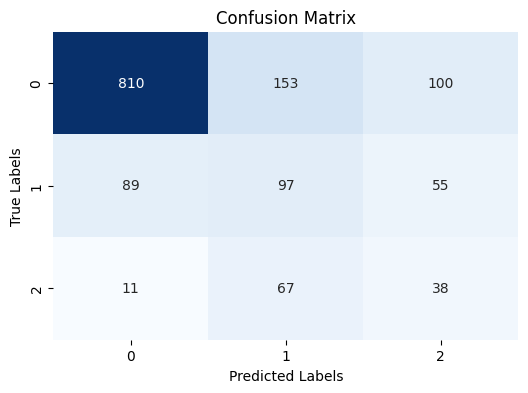


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 810/1063 (76.20%)
Class 1: Correct Predictions / Total True Samples = 97/241 (40.25%)
Class 2: Correct Predictions / Total True Samples = 38/116 (32.76%)

Precision-Recall Curves:


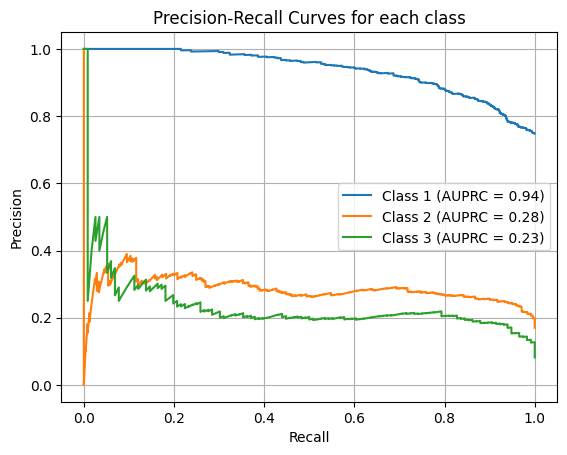


ROC Curves:


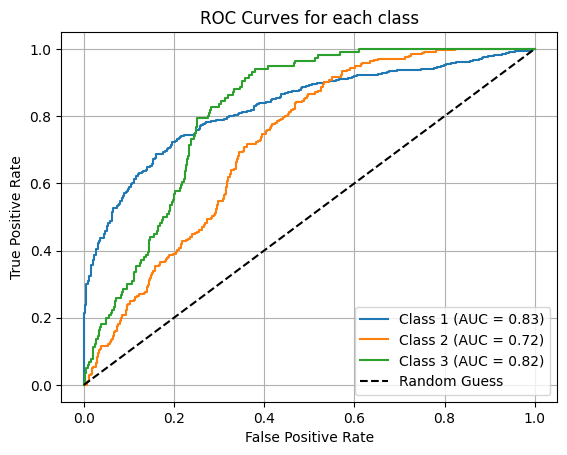


Mean F1 Score: 0.4716
Balanced Accuracy: 0.4974
Average AUPRC: 0.4843

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1063
           1       0.31      0.40      0.35       241
           2       0.20      0.33      0.25       116

    accuracy                           0.67      1420
   macro avg       0.46      0.50      0.47      1420
weighted avg       0.73      0.67      0.69      1420

Fold No: 2
Epoch [1/100], Loss: 1.1948, Accuracy: 0.3394
Validation Loss: 1.3902, Validation Accuracy: 0.3307
Epoch [2/100], Loss: 1.1478, Accuracy: 0.3575
Validation Loss: 1.2926, Validation Accuracy: 0.3320
Epoch [3/100], Loss: 1.1234, Accuracy: 0.3644
Validation Loss: 1.1895, Validation Accuracy: 0.3334
Epoch [4/100], Loss: 1.1128, Accuracy: 0.3661
Validation Loss: 0.9180, Validation Accuracy: 0.3324
Epoch [5/100], Loss: 1.0939, Accuracy: 0.3765
Validation Loss: 1.1004, Validation Accuracy: 0.3664
Epoch [6/100], Los

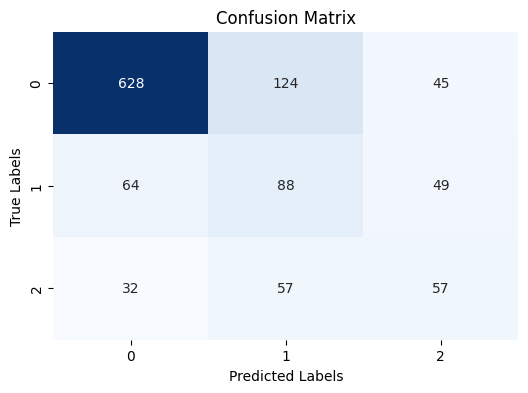


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 628/797 (78.80%)
Class 1: Correct Predictions / Total True Samples = 88/201 (43.78%)
Class 2: Correct Predictions / Total True Samples = 57/146 (39.04%)

Precision-Recall Curves:


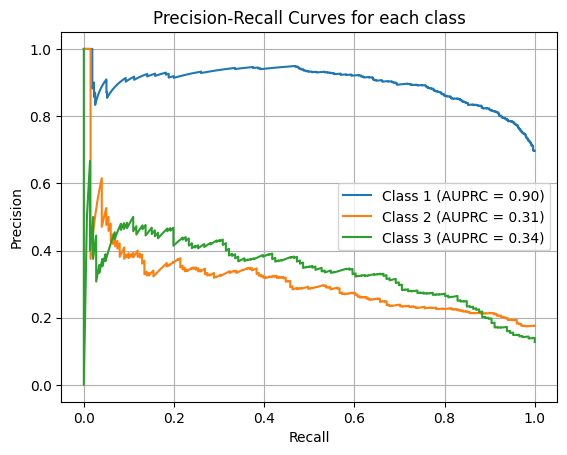


ROC Curves:


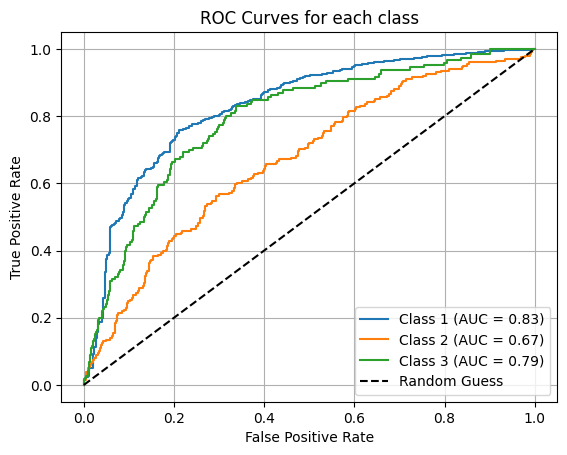


Mean F1 Score: 0.5280
Balanced Accuracy: 0.5387
Average AUPRC: 0.5145

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       797
           1       0.33      0.44      0.37       201
           2       0.38      0.39      0.38       146

    accuracy                           0.68      1144
   macro avg       0.52      0.54      0.53      1144
weighted avg       0.71      0.68      0.69      1144

Fold No: 3
Epoch [1/100], Loss: 1.1772, Accuracy: 0.3484
Validation Loss: 1.0233, Validation Accuracy: 0.3598
Epoch [2/100], Loss: 1.1152, Accuracy: 0.3526
Validation Loss: 1.2914, Validation Accuracy: 0.3807
Epoch [3/100], Loss: 1.1209, Accuracy: 0.3643
Validation Loss: 0.9476, Validation Accuracy: 0.3635
Epoch [4/100], Loss: 1.0906, Accuracy: 0.3911
Validation Loss: 0.9714, Validation Accuracy: 0.4792
Epoch [5/100], Loss: 1.0448, Accuracy: 0.4665
Validation Loss: 1.1907, Validation Accuracy: 0.4610
Epoch [6/100], Los

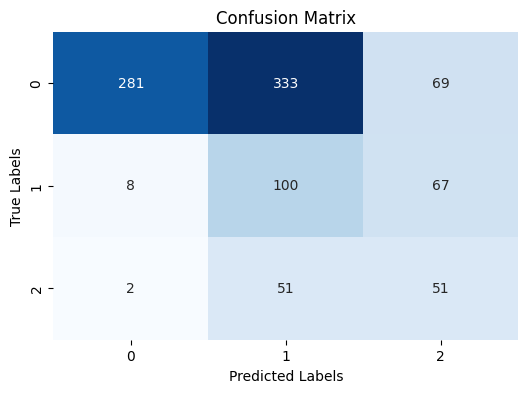


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 281/683 (41.14%)
Class 1: Correct Predictions / Total True Samples = 100/175 (57.14%)
Class 2: Correct Predictions / Total True Samples = 51/104 (49.04%)

Precision-Recall Curves:


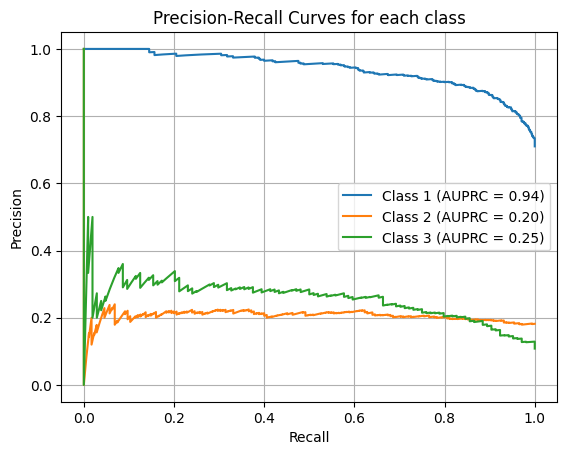


ROC Curves:


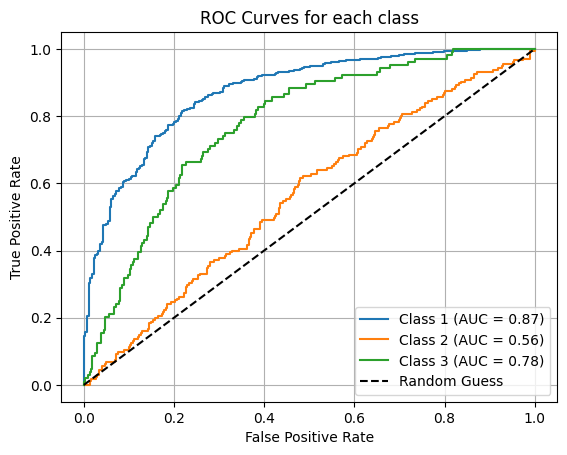


Mean F1 Score: 0.4103
Balanced Accuracy: 0.4911
Average AUPRC: 0.4664

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.41      0.58       683
           1       0.21      0.57      0.30       175
           2       0.27      0.49      0.35       104

    accuracy                           0.45       962
   macro avg       0.48      0.49      0.41       962
weighted avg       0.75      0.45      0.50       962

Fold No: 4
Epoch [1/100], Loss: 1.1794, Accuracy: 0.3370
Validation Loss: 1.1341, Validation Accuracy: 0.3073
Epoch [2/100], Loss: 1.1100, Accuracy: 0.3894
Validation Loss: 1.1369, Validation Accuracy: 0.3010
Epoch [3/100], Loss: 1.0915, Accuracy: 0.3968
Validation Loss: 1.1373, Validation Accuracy: 0.3191
Epoch [4/100], Loss: 1.0334, Accuracy: 0.4602
Validation Loss: 1.0322, Validation Accuracy: 0.4948
Epoch [5/100], Loss: 0.9819, Accuracy: 0.5398
Validation Loss: 1.1038, Validation Accuracy: 0.4910
Epoch [6/100], Los

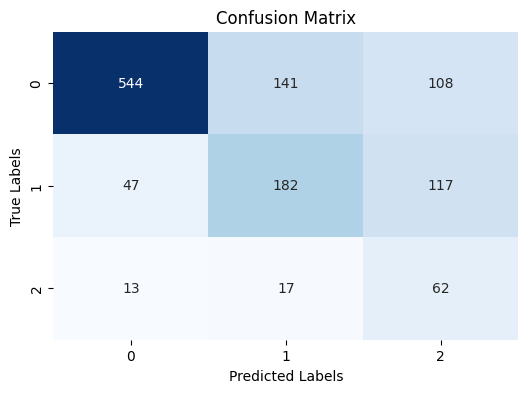


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 544/793 (68.60%)
Class 1: Correct Predictions / Total True Samples = 182/346 (52.60%)
Class 2: Correct Predictions / Total True Samples = 62/92 (67.39%)

Precision-Recall Curves:


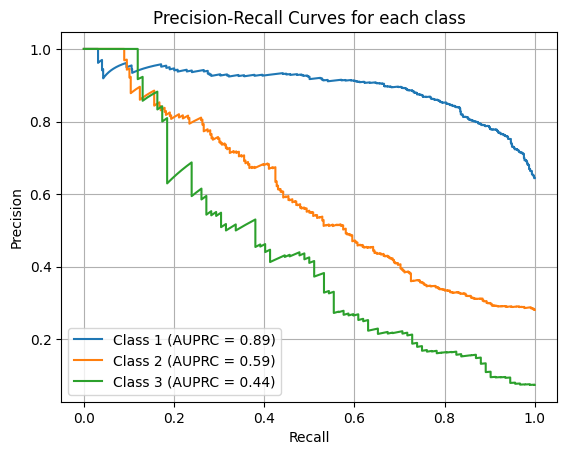


ROC Curves:


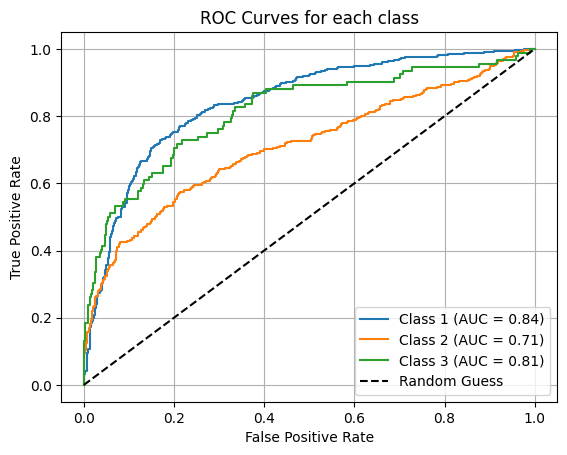


Mean F1 Score: 0.5455
Balanced Accuracy: 0.6286
Average AUPRC: 0.6403

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       793
           1       0.54      0.53      0.53       346
           2       0.22      0.67      0.33        92

    accuracy                           0.64      1231
   macro avg       0.55      0.63      0.55      1231
weighted avg       0.75      0.64      0.68      1231

Fold No: 5
Epoch [1/100], Loss: 1.1579, Accuracy: 0.3543
Validation Loss: 1.3205, Validation Accuracy: 0.3933
Epoch [2/100], Loss: 1.1630, Accuracy: 0.3333
Validation Loss: 0.9994, Validation Accuracy: 0.3430
Epoch [3/100], Loss: 1.1367, Accuracy: 0.3306
Validation Loss: 1.0409, Validation Accuracy: 0.3398
Epoch [4/100], Loss: 1.0988, Accuracy: 0.3898
Validation Loss: 1.0841, Validation Accuracy: 0.4291
Epoch [5/100], Loss: 1.0706, Accuracy: 0.4098
Validation Loss: 0.9908, Validation Accuracy: 0.4185
Epoch [6/100], Los

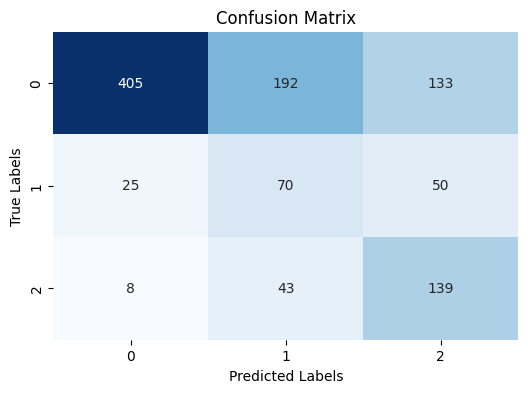


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 405/730 (55.48%)
Class 1: Correct Predictions / Total True Samples = 70/145 (48.28%)
Class 2: Correct Predictions / Total True Samples = 139/190 (73.16%)

Precision-Recall Curves:


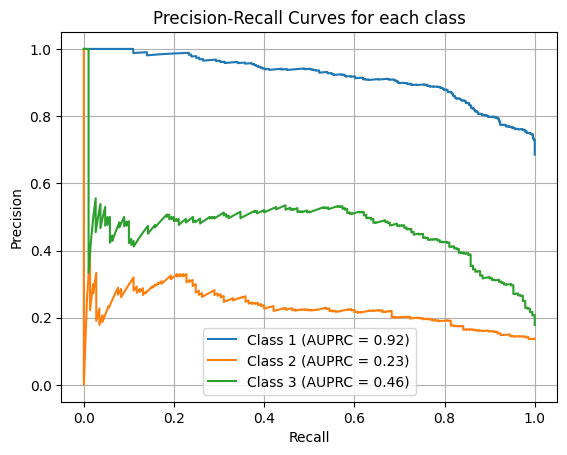


ROC Curves:


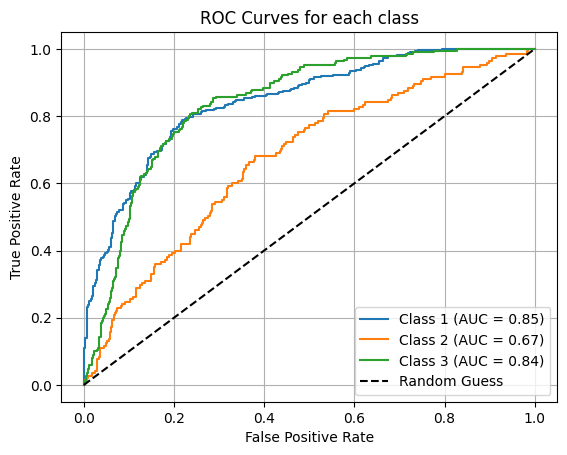


Mean F1 Score: 0.5159
Balanced Accuracy: 0.5897
Average AUPRC: 0.5364

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.55      0.69       730
           1       0.23      0.48      0.31       145
           2       0.43      0.73      0.54       190

    accuracy                           0.58      1065
   macro avg       0.53      0.59      0.52      1065
weighted avg       0.74      0.58      0.61      1065


RESULTS FOR PARAMETER SET 1
Balanced Accuracy for each fold: ['0.4974', '0.5387', '0.4911', '0.6286', '0.5897']
Average Balanced Accuracy across all folds: 0.5491
AUPRC for each fold: ['0.4843', '0.5145', '0.4664', '0.6403', '0.5364']
Average AUPRC across all folds: 0.5284
Best fold (Fold 4) class-wise accuracy: ['0.6860', '0.5260', '0.6739']

PARAMETER SET 2/5
Fold No: 1
Epoch [1/100], Loss: 1.2991, Accuracy: 0.3437
Validation Loss: 1.2021, Validation Accuracy: 0.3431
Epoch [2/100], Loss: 1.1203, Accuracy: 0.3503
Val

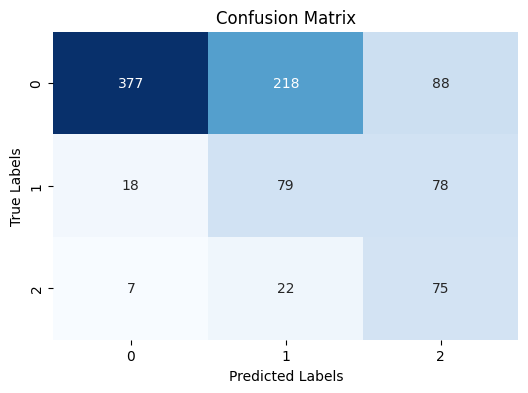


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 377/683 (55.20%)
Class 1: Correct Predictions / Total True Samples = 79/175 (45.14%)
Class 2: Correct Predictions / Total True Samples = 75/104 (72.12%)

Precision-Recall Curves:


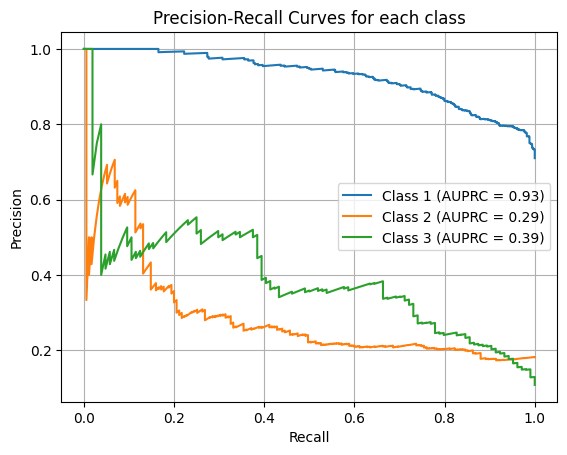


ROC Curves:


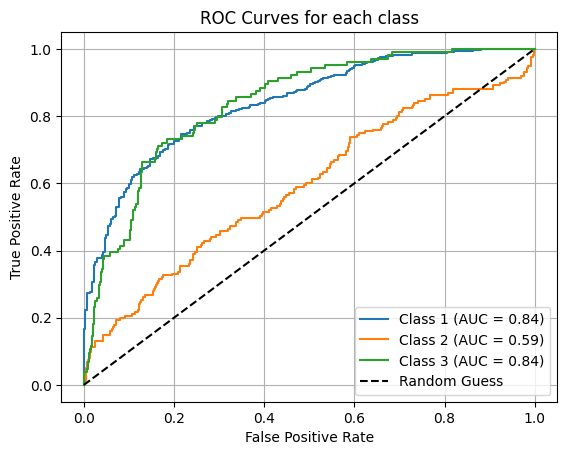


Mean F1 Score: 0.4832
Balanced Accuracy: 0.5749
Average AUPRC: 0.5346

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.55      0.69       683
           1       0.25      0.45      0.32       175
           2       0.31      0.72      0.43       104

    accuracy                           0.55       962
   macro avg       0.50      0.57      0.48       962
weighted avg       0.74      0.55      0.60       962

Fold No: 2
Epoch [1/100], Loss: 1.3174, Accuracy: 0.3333
Validation Loss: 1.0966, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1411, Accuracy: 0.3390
Validation Loss: 0.9971, Validation Accuracy: 0.3333
Epoch [3/100], Loss: 1.1258, Accuracy: 0.3286
Validation Loss: 1.1345, Validation Accuracy: 0.3243
Epoch [4/100], Loss: 1.1139, Accuracy: 0.3183
Validation Loss: 1.2763, Validation Accuracy: 0.3333
Epoch [5/100], Loss: 1.1319, Accuracy: 0.3371
Validation Loss: 1.1288, Validation Accuracy: 0.3042
Epoch [6/100], Los

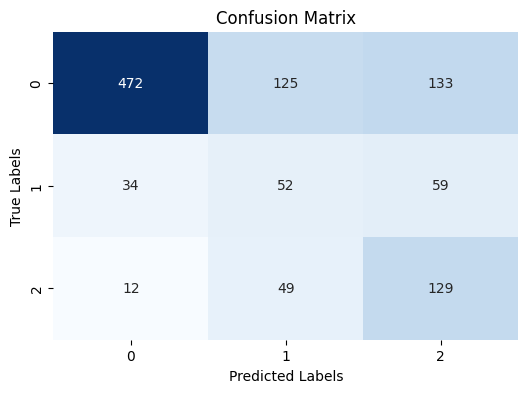


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 472/730 (64.66%)
Class 1: Correct Predictions / Total True Samples = 52/145 (35.86%)
Class 2: Correct Predictions / Total True Samples = 129/190 (67.89%)

Precision-Recall Curves:


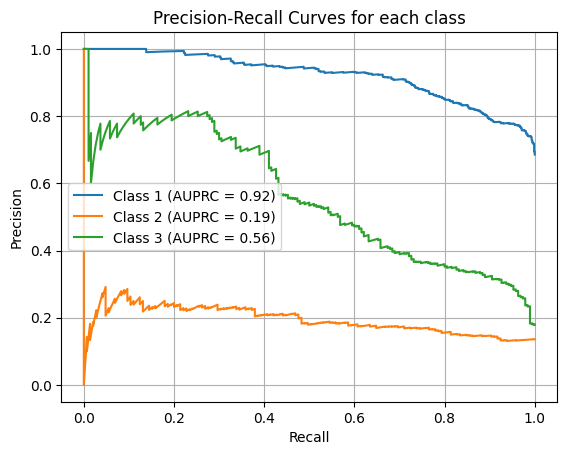


ROC Curves:


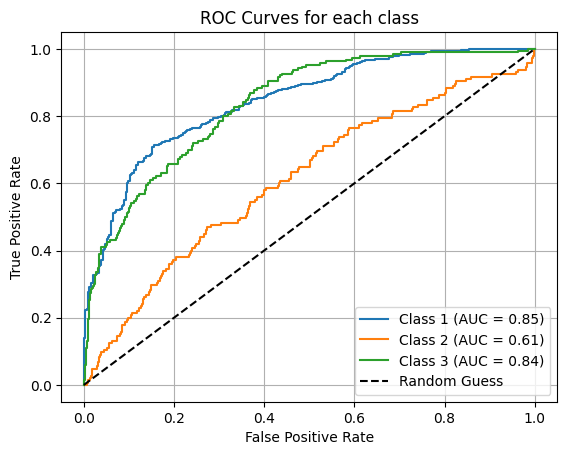


Mean F1 Score: 0.5139
Balanced Accuracy: 0.5614
Average AUPRC: 0.5572

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76       730
           1       0.23      0.36      0.28       145
           2       0.40      0.68      0.50       190

    accuracy                           0.61      1065
   macro avg       0.51      0.56      0.51      1065
weighted avg       0.73      0.61      0.65      1065

Fold No: 3
Epoch [1/100], Loss: 1.2833, Accuracy: 0.3216
Validation Loss: 1.1007, Validation Accuracy: 0.3342
Epoch [2/100], Loss: 1.1198, Accuracy: 0.3596
Validation Loss: 0.9254, Validation Accuracy: 0.3311
Epoch [3/100], Loss: 1.1529, Accuracy: 0.3314
Validation Loss: 1.1609, Validation Accuracy: 0.3333
Epoch [4/100], Loss: 1.1126, Accuracy: 0.3421
Validation Loss: 0.9309, Validation Accuracy: 0.3522
Epoch [5/100], Loss: 1.1364, Accuracy: 0.3558
Validation Loss: 1.0817, Validation Accuracy: 0.3630
Epoch [6/100], Los

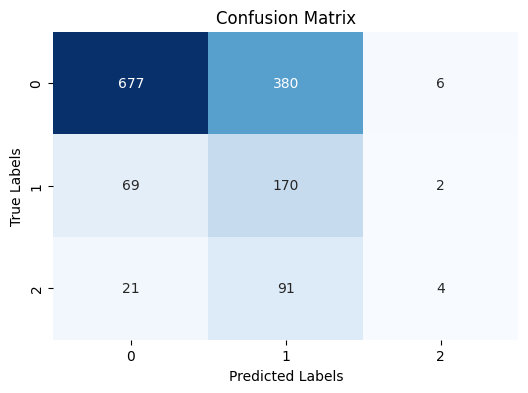


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 677/1063 (63.69%)
Class 1: Correct Predictions / Total True Samples = 170/241 (70.54%)
Class 2: Correct Predictions / Total True Samples = 4/116 (3.45%)

Precision-Recall Curves:


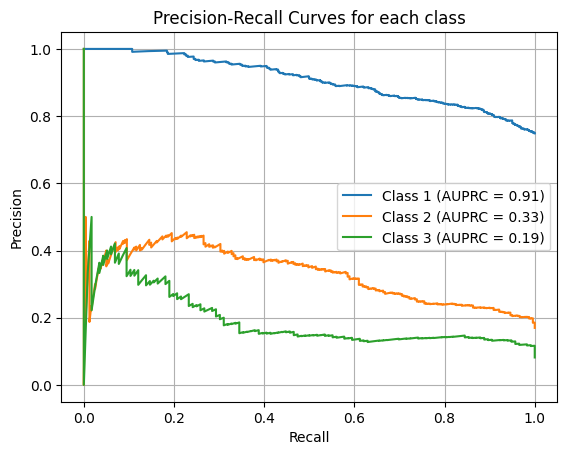


ROC Curves:


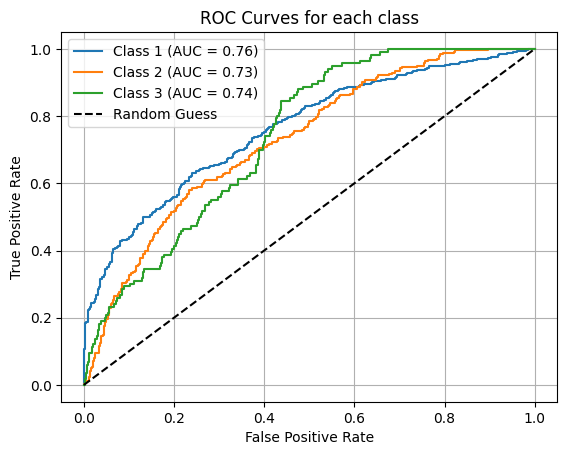


Mean F1 Score: 0.3960
Balanced Accuracy: 0.4589
Average AUPRC: 0.4750

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74      1063
           1       0.27      0.71      0.39       241
           2       0.33      0.03      0.06       116

    accuracy                           0.60      1420
   macro avg       0.49      0.46      0.40      1420
weighted avg       0.73      0.60      0.62      1420

Fold No: 4
Epoch [1/100], Loss: 1.3326, Accuracy: 0.3497
Validation Loss: 0.9414, Validation Accuracy: 0.3330
Epoch [2/100], Loss: 1.1456, Accuracy: 0.3264
Validation Loss: 1.0714, Validation Accuracy: 0.4378
Epoch [3/100], Loss: 1.1302, Accuracy: 0.3610
Validation Loss: 1.0444, Validation Accuracy: 0.3155
Epoch [4/100], Loss: 1.1189, Accuracy: 0.3446
Validation Loss: 1.1831, Validation Accuracy: 0.4277
Epoch [5/100], Loss: 1.1113, Accuracy: 0.3670
Validation Loss: 1.2360, Validation Accuracy: 0.4879
Epoch [6/100], Los

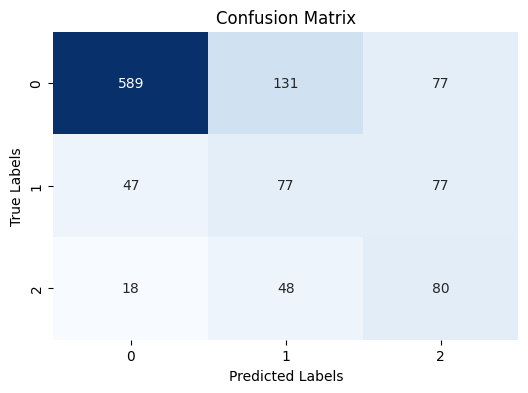


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 589/797 (73.90%)
Class 1: Correct Predictions / Total True Samples = 77/201 (38.31%)
Class 2: Correct Predictions / Total True Samples = 80/146 (54.79%)

Precision-Recall Curves:


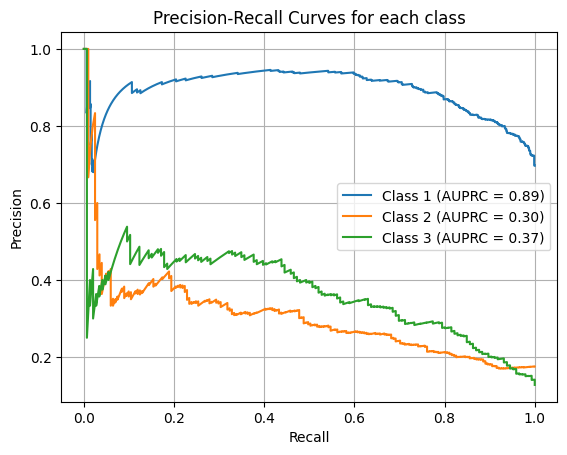


ROC Curves:


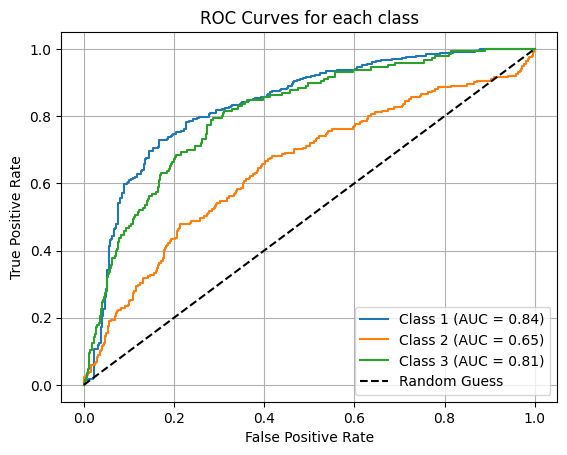


Mean F1 Score: 0.5233
Balanced Accuracy: 0.5567
Average AUPRC: 0.5197

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       797
           1       0.30      0.38      0.34       201
           2       0.34      0.55      0.42       146

    accuracy                           0.65      1144
   macro avg       0.51      0.56      0.52      1144
weighted avg       0.72      0.65      0.68      1144

Fold No: 5
Epoch [1/100], Loss: 1.2147, Accuracy: 0.3602
Validation Loss: 1.0833, Validation Accuracy: 0.4042
Epoch [2/100], Loss: 1.1335, Accuracy: 0.3602
Validation Loss: 1.1499, Validation Accuracy: 0.3456
Epoch [3/100], Loss: 1.1272, Accuracy: 0.3480
Validation Loss: 1.1468, Validation Accuracy: 0.3284
Epoch [4/100], Loss: 1.0940, Accuracy: 0.3886
Validation Loss: 1.0280, Validation Accuracy: 0.4783
Epoch [5/100], Loss: 1.0363, Accuracy: 0.5098
Validation Loss: 0.8861, Validation Accuracy: 0.5066
Epoch [6/100], Los

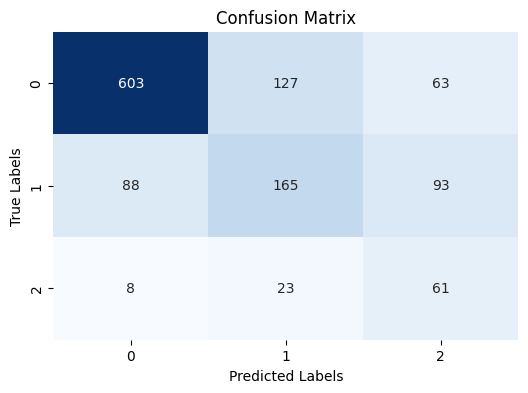


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 603/793 (76.04%)
Class 1: Correct Predictions / Total True Samples = 165/346 (47.69%)
Class 2: Correct Predictions / Total True Samples = 61/92 (66.30%)

Precision-Recall Curves:


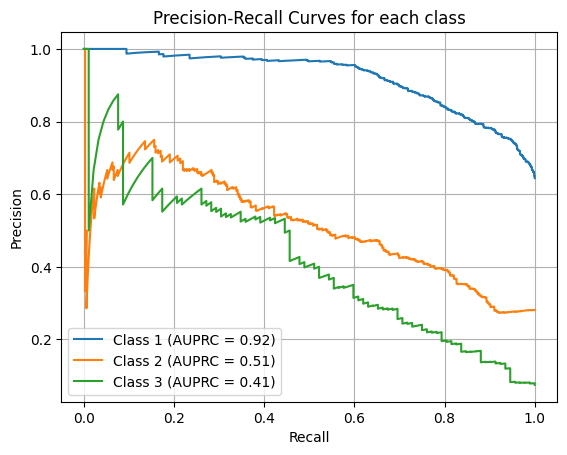


ROC Curves:


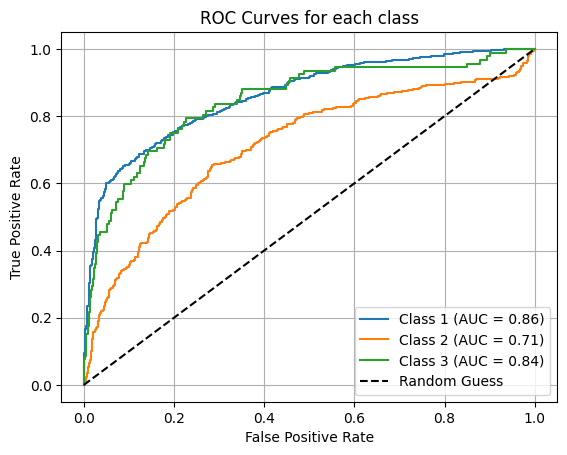


Mean F1 Score: 0.5675
Balanced Accuracy: 0.6334
Average AUPRC: 0.6163

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       793
           1       0.52      0.48      0.50       346
           2       0.28      0.66      0.39        92

    accuracy                           0.67      1231
   macro avg       0.56      0.63      0.57      1231
weighted avg       0.72      0.67      0.69      1231


RESULTS FOR PARAMETER SET 2
Balanced Accuracy for each fold: ['0.5749', '0.5614', '0.4589', '0.5567', '0.6334']
Average Balanced Accuracy across all folds: 0.5571
AUPRC for each fold: ['0.5346', '0.5572', '0.4750', '0.5197', '0.6163']
Average AUPRC across all folds: 0.5406
Best fold (Fold 5) class-wise accuracy: ['0.7604', '0.4769', '0.6630']

PARAMETER SET 3/5
Fold No: 1
Epoch [1/100], Loss: 1.2090, Accuracy: 0.3376
Validation Loss: 1.0892, Validation Accuracy: 0.3619
Epoch [2/100], Loss: 1.1587, Accuracy: 0.3771
Val

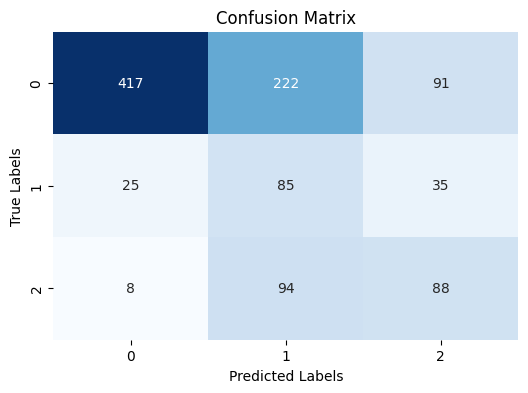


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 417/730 (57.12%)
Class 1: Correct Predictions / Total True Samples = 85/145 (58.62%)
Class 2: Correct Predictions / Total True Samples = 88/190 (46.32%)

Precision-Recall Curves:


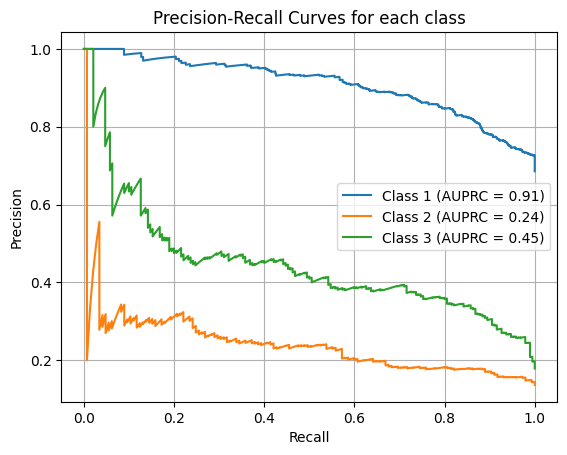


ROC Curves:


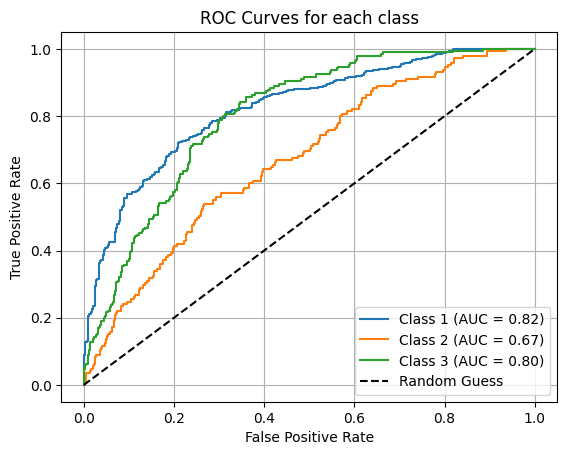


Mean F1 Score: 0.4846
Balanced Accuracy: 0.5402
Average AUPRC: 0.5307

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.57      0.71       730
           1       0.21      0.59      0.31       145
           2       0.41      0.46      0.44       190

    accuracy                           0.55      1065
   macro avg       0.52      0.54      0.48      1065
weighted avg       0.74      0.55      0.60      1065

Fold No: 2
Epoch [1/100], Loss: 1.2478, Accuracy: 0.3246
Validation Loss: 1.1678, Validation Accuracy: 0.3464
Epoch [2/100], Loss: 1.1546, Accuracy: 0.3382
Validation Loss: 1.0791, Validation Accuracy: 0.3678
Epoch [3/100], Loss: 1.1150, Accuracy: 0.3704
Validation Loss: 1.1819, Validation Accuracy: 0.4379
Epoch [4/100], Loss: 1.1219, Accuracy: 0.3743
Validation Loss: 1.1209, Validation Accuracy: 0.3923
Epoch [5/100], Loss: 1.1141, Accuracy: 0.3840
Validation Loss: 0.8743, Validation Accuracy: 0.3696
Epoch [6/100], Los

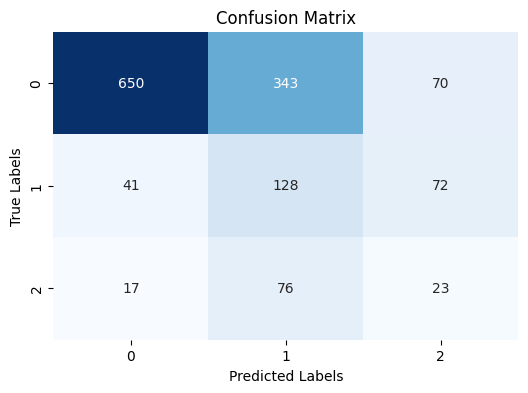


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 650/1063 (61.15%)
Class 1: Correct Predictions / Total True Samples = 128/241 (53.11%)
Class 2: Correct Predictions / Total True Samples = 23/116 (19.83%)

Precision-Recall Curves:


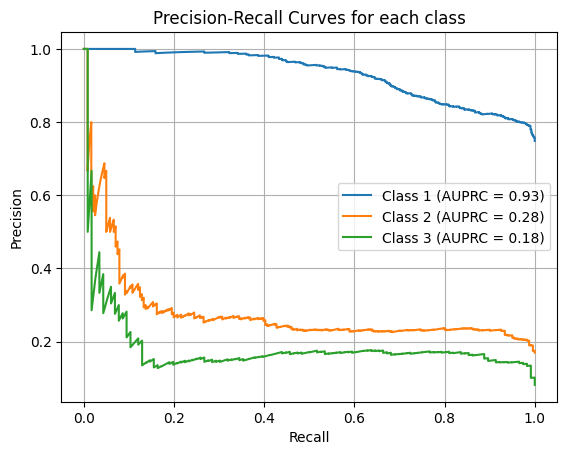


ROC Curves:


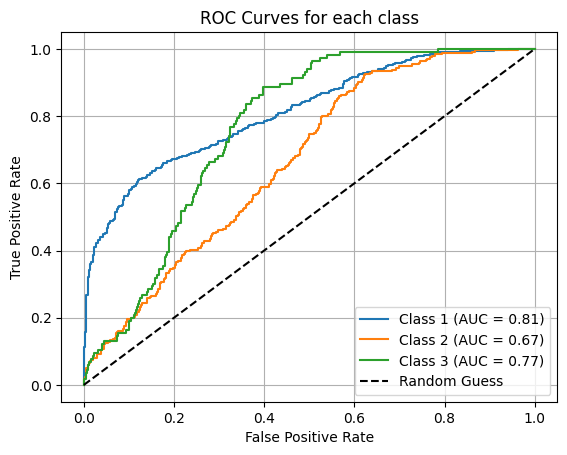


Mean F1 Score: 0.4075
Balanced Accuracy: 0.4470
Average AUPRC: 0.4646

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.61      0.73      1063
           1       0.23      0.53      0.32       241
           2       0.14      0.20      0.16       116

    accuracy                           0.56      1420
   macro avg       0.43      0.45      0.41      1420
weighted avg       0.74      0.56      0.62      1420

Fold No: 3
Epoch [1/100], Loss: 1.2091, Accuracy: 0.3606
Validation Loss: 1.0133, Validation Accuracy: 0.3439
Epoch [2/100], Loss: 1.1285, Accuracy: 0.3629
Validation Loss: 1.4688, Validation Accuracy: 0.3347
Epoch [3/100], Loss: 1.1185, Accuracy: 0.3583
Validation Loss: 0.9048, Validation Accuracy: 0.3335
Epoch [4/100], Loss: 1.0898, Accuracy: 0.4143
Validation Loss: 1.0947, Validation Accuracy: 0.4382
Epoch [5/100], Loss: 1.0444, Accuracy: 0.4673
Validation Loss: 1.0945, Validation Accuracy: 0.4004
Epoch [6/100], Los

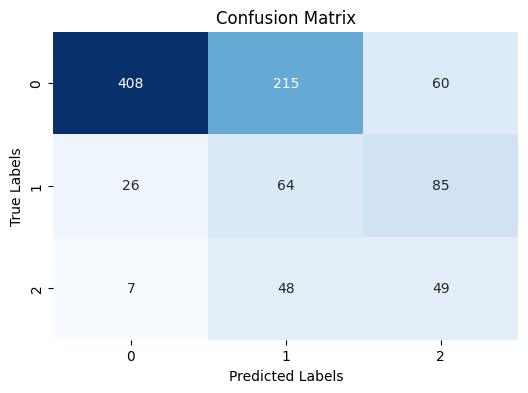


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 408/683 (59.74%)
Class 1: Correct Predictions / Total True Samples = 64/175 (36.57%)
Class 2: Correct Predictions / Total True Samples = 49/104 (47.12%)

Precision-Recall Curves:


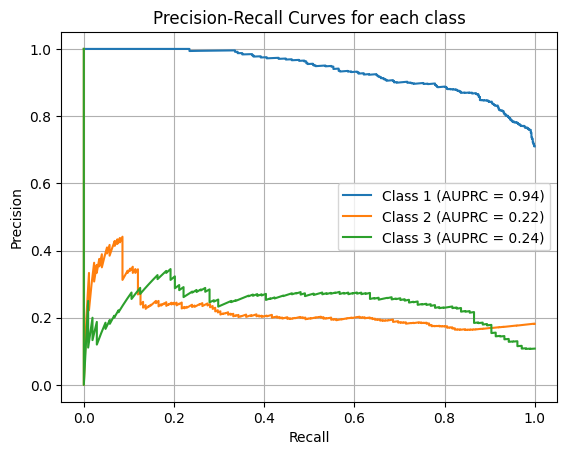


ROC Curves:


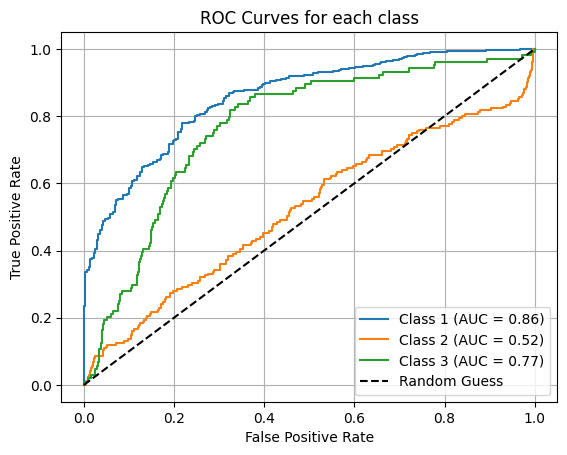


Mean F1 Score: 0.4366
Balanced Accuracy: 0.4781
Average AUPRC: 0.4646

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.60      0.73       683
           1       0.20      0.37      0.25       175
           2       0.25      0.47      0.33       104

    accuracy                           0.54       962
   macro avg       0.46      0.48      0.44       962
weighted avg       0.72      0.54      0.60       962

Fold No: 4
Epoch [1/100], Loss: 1.1996, Accuracy: 0.3518
Validation Loss: 1.0078, Validation Accuracy: 0.3649
Epoch [2/100], Loss: 1.1348, Accuracy: 0.3709
Validation Loss: 1.2242, Validation Accuracy: 0.3365
Epoch [3/100], Loss: 1.1143, Accuracy: 0.4019
Validation Loss: 0.9929, Validation Accuracy: 0.3567
Epoch [4/100], Loss: 1.0899, Accuracy: 0.4226
Validation Loss: 1.2006, Validation Accuracy: 0.4730
Epoch [5/100], Loss: 1.0353, Accuracy: 0.4771
Validation Loss: 1.2240, Validation Accuracy: 0.4711
Epoch [6/100], Los

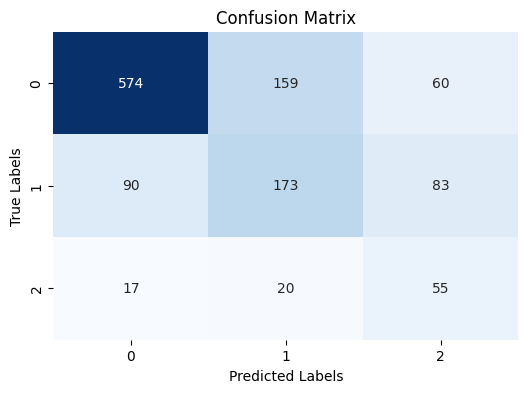


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 574/793 (72.38%)
Class 1: Correct Predictions / Total True Samples = 173/346 (50.00%)
Class 2: Correct Predictions / Total True Samples = 55/92 (59.78%)

Precision-Recall Curves:


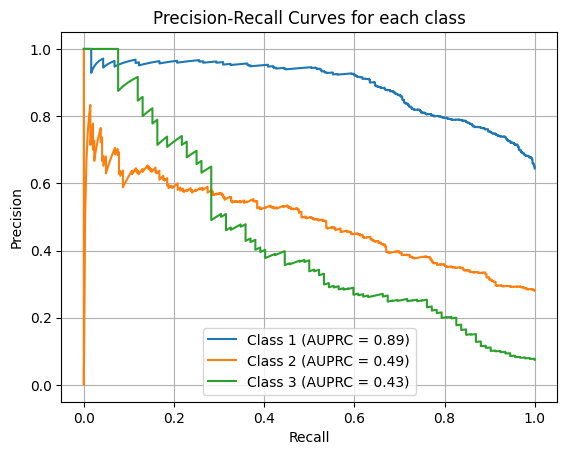


ROC Curves:


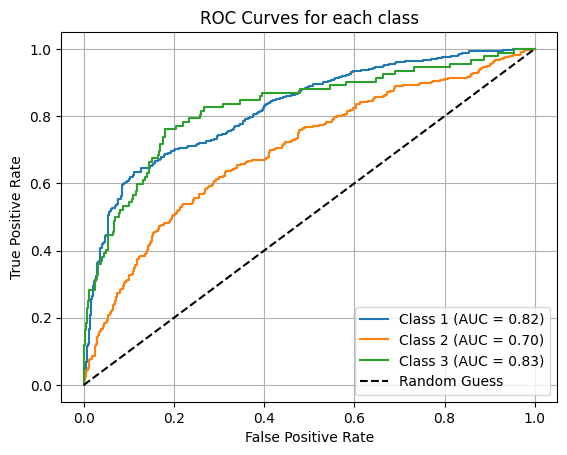


Mean F1 Score: 0.5513
Balanced Accuracy: 0.6072
Average AUPRC: 0.6026

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       793
           1       0.49      0.50      0.50       346
           2       0.28      0.60      0.38        92

    accuracy                           0.65      1231
   macro avg       0.54      0.61      0.55      1231
weighted avg       0.70      0.65      0.67      1231

Fold No: 5
Epoch [1/100], Loss: 1.2603, Accuracy: 0.3325
Validation Loss: 1.0513, Validation Accuracy: 0.3340
Epoch [2/100], Loss: 1.1447, Accuracy: 0.3553
Validation Loss: 0.9969, Validation Accuracy: 0.3384
Epoch [3/100], Loss: 1.1053, Accuracy: 0.3610
Validation Loss: 1.0511, Validation Accuracy: 0.4273
Epoch [4/100], Loss: 1.1025, Accuracy: 0.3984
Validation Loss: 0.9419, Validation Accuracy: 0.4080
Epoch [5/100], Loss: 1.0974, Accuracy: 0.4041
Validation Loss: 1.1039, Validation Accuracy: 0.3974
Epoch [6/100], Los

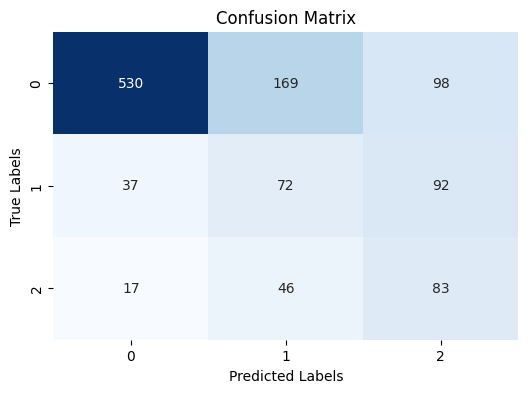


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 530/797 (66.50%)
Class 1: Correct Predictions / Total True Samples = 72/201 (35.82%)
Class 2: Correct Predictions / Total True Samples = 83/146 (56.85%)

Precision-Recall Curves:


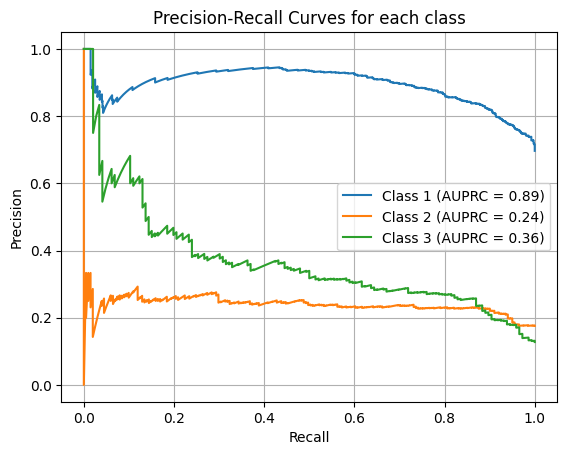


ROC Curves:


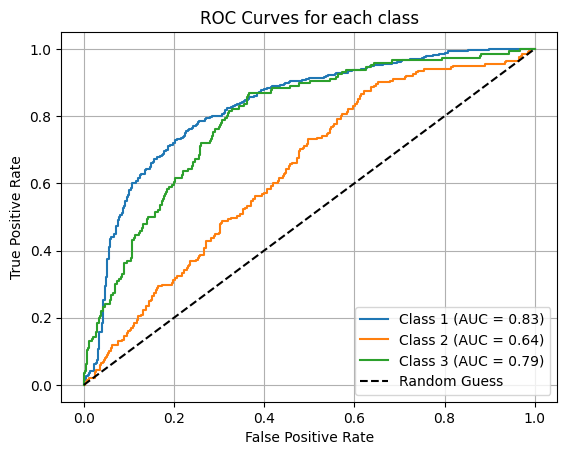


Mean F1 Score: 0.4863
Balanced Accuracy: 0.5306
Average AUPRC: 0.4985

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.66      0.77       797
           1       0.25      0.36      0.30       201
           2       0.30      0.57      0.40       146

    accuracy                           0.60      1144
   macro avg       0.49      0.53      0.49      1144
weighted avg       0.72      0.60      0.64      1144


RESULTS FOR PARAMETER SET 3
Balanced Accuracy for each fold: ['0.5402', '0.4470', '0.4781', '0.6072', '0.5306']
Average Balanced Accuracy across all folds: 0.5206
AUPRC for each fold: ['0.5307', '0.4646', '0.4646', '0.6026', '0.4985']
Average AUPRC across all folds: 0.5122
Best fold (Fold 4) class-wise accuracy: ['0.7238', '0.5000', '0.5978']

PARAMETER SET 4/5
Fold No: 1
Epoch [1/100], Loss: 1.3190, Accuracy: 0.3114
Validation Loss: 1.0581, Validation Accuracy: 0.3221
Epoch [2/100], Loss: 1.1226, Accuracy: 0.3379
Val

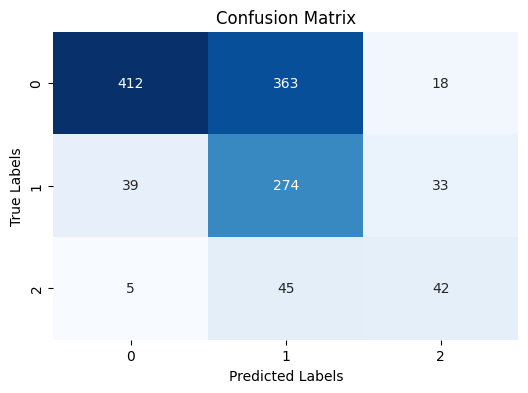


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 412/793 (51.95%)
Class 1: Correct Predictions / Total True Samples = 274/346 (79.19%)
Class 2: Correct Predictions / Total True Samples = 42/92 (45.65%)

Precision-Recall Curves:


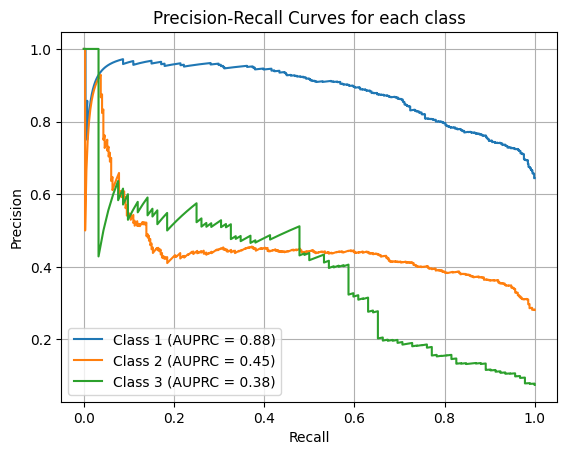


ROC Curves:


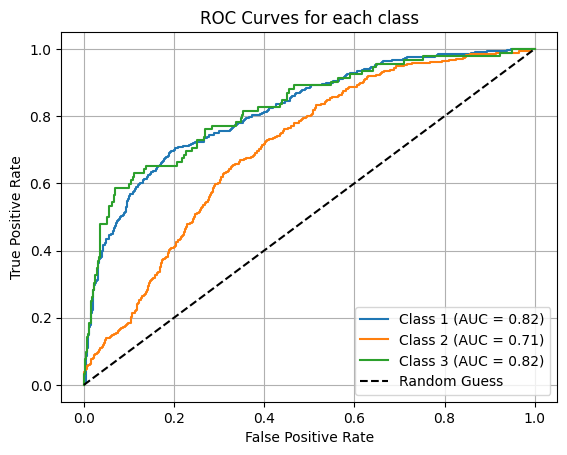


Mean F1 Score: 0.5490
Balanced Accuracy: 0.5893
Average AUPRC: 0.5722

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       793
           1       0.40      0.79      0.53       346
           2       0.45      0.46      0.45        92

    accuracy                           0.59      1231
   macro avg       0.59      0.59      0.55      1231
weighted avg       0.73      0.59      0.61      1231

Fold No: 2
Epoch [1/100], Loss: 1.3545, Accuracy: 0.3289
Validation Loss: 1.0650, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1110, Accuracy: 0.3333
Validation Loss: 1.1914, Validation Accuracy: 0.3333
Epoch [3/100], Loss: 1.1162, Accuracy: 0.3289
Validation Loss: 1.0161, Validation Accuracy: 0.3274
Epoch [4/100], Loss: 1.1340, Accuracy: 0.3451
Validation Loss: 1.0901, Validation Accuracy: 0.3895
Epoch [5/100], Loss: 1.0967, Accuracy: 0.3886
Validation Loss: 1.3126, Validation Accuracy: 0.3191
Epoch [6/100], Los

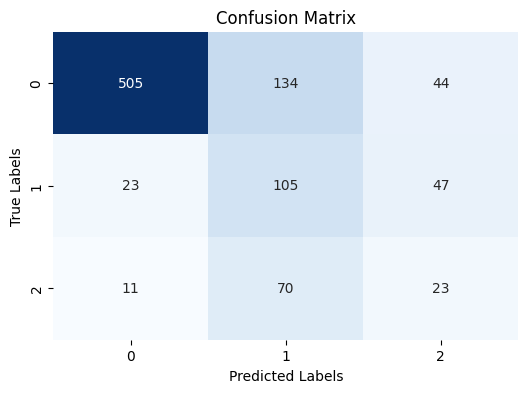


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 505/683 (73.94%)
Class 1: Correct Predictions / Total True Samples = 105/175 (60.00%)
Class 2: Correct Predictions / Total True Samples = 23/104 (22.12%)

Precision-Recall Curves:


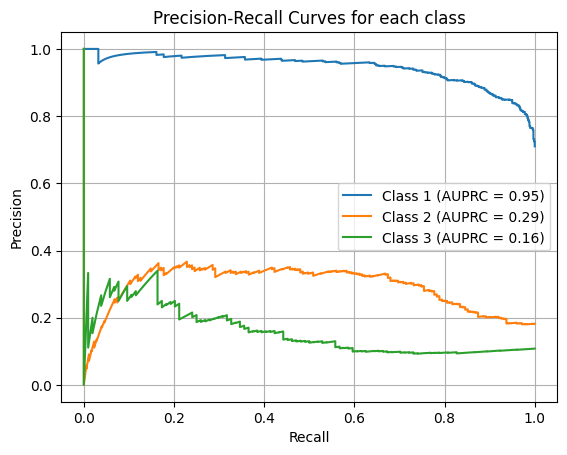


ROC Curves:


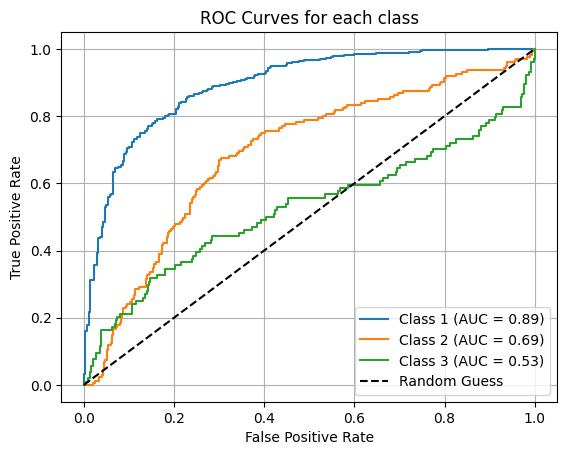


Mean F1 Score: 0.4905
Balanced Accuracy: 0.5202
Average AUPRC: 0.4640

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       683
           1       0.34      0.60      0.43       175
           2       0.20      0.22      0.21       104

    accuracy                           0.66       962
   macro avg       0.49      0.52      0.49       962
weighted avg       0.75      0.66      0.69       962

Fold No: 3
Epoch [1/100], Loss: 1.4314, Accuracy: 0.3183
Validation Loss: 1.1997, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1219, Accuracy: 0.3183
Validation Loss: 1.0899, Validation Accuracy: 0.3389
Epoch [3/100], Loss: 1.1229, Accuracy: 0.3399
Validation Loss: 1.0968, Validation Accuracy: 0.3716
Epoch [4/100], Loss: 1.1388, Accuracy: 0.3249
Validation Loss: 1.2379, Validation Accuracy: 0.3333
Epoch [5/100], Loss: 1.1317, Accuracy: 0.3371
Validation Loss: 1.2283, Validation Accuracy: 0.2991
Epoch [6/100], Los

In [ ]:
import pandas as pd
import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

# Top 5 Optuna trials by test accuracy, with trial number and accuracy as comments
best_hyperparameters = [
    {'embed_dim': 96, 'depths': [2, 2, 6, 2], 'num_heads': [4, 8, 16, 32], 'window_size': 7, 'mlp_ratio': 2.9861220360810963, 'drop_rate': 0.16216076879292074, 'attn_drop_rate': 0.44612154316009744, 'drop_path_rate': 0.25685583296677783, 'learning_rate': 2.8627670095715348e-05, 'weight_decay': 1.4466694509421081e-06, 'batch_size': 32, 'optimizer': 'Adam', 'label_smoothing': 0.1, 'factor': 1}, # trial 45, acc=0.6050
    {'embed_dim': 96, 'depths': [2, 2, 6, 2], 'num_heads': [4, 8, 16, 32], 'window_size': 14, 'mlp_ratio': 3.264097261240086, 'drop_rate': 0.17697250207435888, 'attn_drop_rate': 0.1587092445885201, 'drop_path_rate': 0.32503445629836103, 'learning_rate': 9.71293620159996e-05, 'weight_decay': 5.895146493387213e-05, 'batch_size': 32, 'optimizer': 'Adam', 'label_smoothing': 0.1, 'factor': 1}, # trial 77, acc=0.5867
    {'embed_dim': 128, 'depths': [2, 2, 6, 2], 'num_heads': [4, 8, 16, 32], 'window_size': 7, 'mlp_ratio': 2.2198622887127923, 'drop_rate': 0.15561984217115873, 'attn_drop_rate': 0.4317974464042778, 'drop_path_rate': 0.3354770879096804, 'learning_rate': 2.598797602447637e-05, 'weight_decay': 1.5733724493954987e-06, 'batch_size': 32, 'optimizer': 'Adam', 'label_smoothing': 0.1, 'factor': 1}, # trial 48, acc=0.5946
    {'embed_dim': 96, 'depths': [2, 2, 6, 2], 'num_heads': [4, 8, 16, 32], 'window_size': 7, 'mlp_ratio': 3.7322404808547236, 'drop_rate': 0.1908073187624648, 'attn_drop_rate': 0.2373387353024647, 'drop_path_rate': 0.21829547309907876, 'learning_rate': 0.00012098074183643413, 'weight_decay': 4.297441355108694e-05, 'batch_size': 32, 'optimizer': 'Adam', 'label_smoothing': 0.1, 'factor': 1}, # trial 28, acc=0.5674
    {'embed_dim': 128, 'depths': [2, 2, 18, 2], 'num_heads': [3, 6, 12, 24], 'window_size': 7, 'mlp_ratio': 3.8542760373229834, 'drop_rate': 0.4448501512109087, 'attn_drop_rate': 0.21123584057825195, 'drop_path_rate': 0.33227569336603613, 'learning_rate': 1.350247474633488e-05, 'weight_decay': 1.3429740320614909e-05, 'batch_size': 32, 'optimizer': 'Adam', 'label_smoothing': 0.1, 'factor': 1}, # trial 49, acc=0.5666
]

# Store results for all parameter sets
all_results = []

for parameter in range(len(best_hyperparameters)):
    
    #clear the GPU cache
    torch.cuda.empty_cache()

    print(f"\n{'='*60}")
    print(f"PARAMETER SET {parameter + 1}/5")
    print(f"{'='*60}")

    # Load the best hyperparameters for the current trial
    
    hyperparameters = best_hyperparameters[parameter]
    # Unpack hyperparameters
    config = {
        "embed_dim": hyperparameters["embed_dim"],
        "depths": hyperparameters["depths"],
        "num_heads": hyperparameters["num_heads"],
        "window_size": hyperparameters["window_size"],
        "mlp_ratio": hyperparameters["mlp_ratio"],
        "drop_rate": hyperparameters["drop_rate"],
        "attn_drop_rate": hyperparameters["attn_drop_rate"],
        "drop_path_rate": hyperparameters["drop_path_rate"],
    }
    
    learning_rate = hyperparameters["learning_rate"]
    weight_decay = hyperparameters["weight_decay"]
    batch_size = hyperparameters["batch_size"]
    optimizer = hyperparameters["optimizer"]
    label_smoothing = hyperparameters["label_smoothing"]
    factor = hyperparameters["factor"]

    # Fold indices and other configurations
    num_folds = 5
    fold_indices = np.random.permutation(np.arange(num_folds))
    val_fold_indices = np.roll(fold_indices, 1)

    test_folds_chosen = []
    val_folds_chosen = []
    fold_confusion_matrices = []  # To store confusion matrices for each fold
    fold_accuracies = []  # To store balanced accuracy for each fold
    fold_auprcs = []  # To store AUPRC for each fold
    fold_class_accuracies = []  # To store class-wise accuracies for each fold

    # Model and training configurations
    num_classes = 3
    epochs = 100
    input_shape = (3,224,224)  # (channels, height, width)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    
    #set random seed for reproducibility
    torch.manual_seed(42)
    debug_mode_flag = False
    np.random.seed(42)
    
    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'Fold No: {fold_idx + 1}')
        
        # Initialize model, loss, and optimizer
        fold_model = model = SwinTransformer(
            img_size=224,
            patch_size=4,
            in_chans=3,
            num_classes=num_classes,
            embed_dim=config['embed_dim'],
            depths=config['depths'],
            num_heads=config['num_heads'],
            window_size=config['window_size'],
            mlp_ratio=config['mlp_ratio'],
            qkv_bias=True,
            drop_rate=config['drop_rate'],
            attn_drop_rate=config['attn_drop_rate'],
            drop_path_rate=config['drop_path_rate'],
            norm_layer=nn.LayerNorm
        ).to(device)
        
        criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
        optimizer = optim.Adam(fold_model.parameters(), lr=learning_rate)
        
        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.transpose(0, 3, 1, 2)  # Transpose to match PyTorch input format

        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)
        
        early_stopping = EarlyStopping(patience=10)
        
        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            
            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []
            
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold].transpose(0, 3, 1, 2)
            # val_data = eeg_folds[val_fold]
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold].transpose(0, 3, 1, 2)
        # test_data = eeg_folds[test_fold]
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)

        # Calculate class-wise accuracy
        class_report = classification_report(test_labels_list, test_preds, output_dict=True)
        class_accuracies = [class_report[str(i)]['recall'] for i in range(num_classes)]
        fold_class_accuracies.append(class_accuracies)

        test_labels_binarized = label_binarize(test_labels_list, classes=np.arange(num_classes))
        test_auprcs = []
        for class_idx in range(num_classes):
            precision, recall, _ = precision_recall_curve(test_labels_binarized[:, class_idx], np.array(test_probs)[:, class_idx])
            auprc = auc(recall, precision)
            test_auprcs.append(auprc)

        mean_test_auprc = np.mean(test_auprcs)
        fold_auprcs.append(mean_test_auprc)

        print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Calculate metrics across all folds
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)
    
    # Find best fold (highest balanced accuracy)
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_class_accuracies = fold_class_accuracies[best_fold_idx]
    
    # Print results for current parameter set
    print(f"\n{'='*50}")
    print(f"RESULTS FOR PARAMETER SET {parameter + 1}")
    print(f"{'='*50}")
    print(f'Balanced Accuracy for each fold: {[f"{acc:.4f}" for acc in fold_accuracies]}')
    print(f'Average Balanced Accuracy across all folds: {mean_accuracy:.4f}')
    print(f'AUPRC for each fold: {[f"{auprc:.4f}" for auprc in fold_auprcs]}')
    print(f'Average AUPRC across all folds: {average_auprc:.4f}')
    print(f'Best fold (Fold {best_fold_idx + 1}) class-wise accuracy: {[f"{acc:.4f}" for acc in best_fold_class_accuracies]}')
    
    # Store results
    result_dict = {
        'parameter_set': parameter + 1,
        'fold_balanced_accuracies': fold_accuracies,
        'mean_balanced_accuracy': mean_accuracy,
        'fold_auprcs': fold_auprcs,
        'mean_auprc': average_auprc,
        'best_fold_idx': best_fold_idx + 1,
        'best_fold_class_accuracies': best_fold_class_accuracies
    }
    all_results.append(result_dict)

# Print summary of all results
print(f"\n{'='*80}")
print("SUMMARY OF ALL PARAMETER SETS")
print(f"{'='*80}")

for i, result in enumerate(all_results):
    print(f"\nParameter Set {result['parameter_set']}:")
    print(f"  Mean Balanced Accuracy: {result['mean_balanced_accuracy']:.4f}")
    print(f"  Mean AUPRC: {result['mean_auprc']:.4f}")
    print(f"  Best Fold: {result['best_fold_idx']}")
    print(f"  Best Fold Class Accuracies: {[f'{acc:.4f}' for acc in result['best_fold_class_accuracies']]}")

# Find overall best parameter set
best_param_set_idx = np.argmax([result['mean_balanced_accuracy'] for result in all_results])
print(f"\nBest Parameter Set: {best_param_set_idx + 1} with Mean Balanced Accuracy: {all_results[best_param_set_idx]['mean_balanced_accuracy']:.4f}")


In [1]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [1]:
import tensorflow as tf

#list available gpu
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

ModuleNotFoundError: No module named 'tensorflow'